In [1]:
library(MASS)
library(corrplot)
library(boot)
library(leaps)
library(splines)
library(tree)

corrplot 0.92 loaded



In [2]:
roughContact <- read.csv('../../../data/RoughContact/pulloff4AIlabelled.csv', header = TRUE,  sep = ',')

head(roughContact)

,Hurst,L,lambdaR,lambdaS,surfaceEnergy,rho,pulloff
,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,0.8,512,256,4,0.008652,0.037603,4.02e-07
2,0.8,512,256,4,0.017304,0.059691,1.00e-06
3,0.8,512,256,4,0.034609,0.094753,2.80e-06
4,0.8,512,256,4,0.060566,0.137601,6.76e-06
5,0.8,512,256,4,0.112480,0.207899,2.94e-05
6,0.8,512,256,4,0.173047,0.277062,7.81e-05


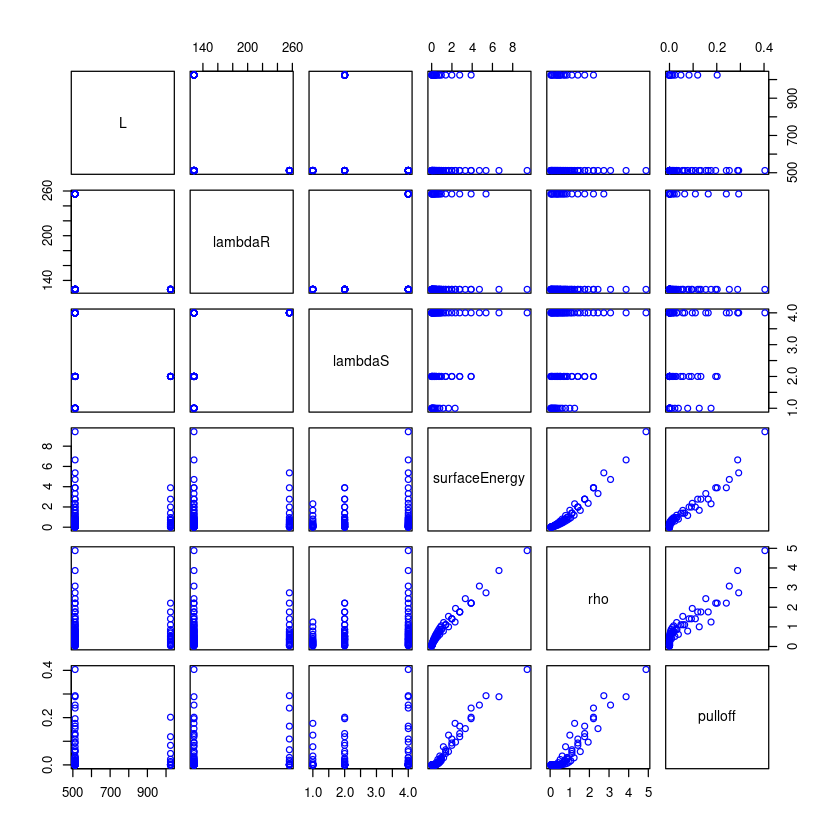

In [3]:
pairs(~ L + lambdaR + lambdaS + surfaceEnergy + rho + pulloff, data = roughContact, col = 'blue')

In [4]:
summary(roughContact)

     Hurst           L             lambdaR         lambdaS     
 Min.   :0.8   Min.   : 512.0   Min.   :128.0   Min.   :1.000  
 1st Qu.:0.8   1st Qu.: 512.0   1st Qu.:128.0   1st Qu.:2.000  
 Median :0.8   Median : 512.0   Median :128.0   Median :2.000  
 Mean   :0.8   Mean   : 613.3   Mean   :154.7   Mean   :2.677  
 3rd Qu.:0.8   3rd Qu.: 512.0   3rd Qu.:128.0   3rd Qu.:4.000  
 Max.   :0.8   Max.   :1024.0   Max.   :256.0   Max.   :4.000  
 surfaceEnergy           rho             pulloff         
 Min.   :0.006417   Min.   :0.02465   Min.   :0.0000001  
 1st Qu.:0.112480   1st Qu.:0.20790   1st Qu.:0.0000162  
 Median :0.389355   Median :0.47574   Median :0.0008118  
 Mean   :0.969222   Mean   :0.74973   Mean   :0.0392707  
 3rd Qu.:0.951758   3rd Qu.:0.89198   3rd Qu.:0.0304588  
 Max.   :9.425140   Max.   :4.88339   Max.   :0.4036770  

Warning message in cor(roughContact):
“the standard deviation is zero”


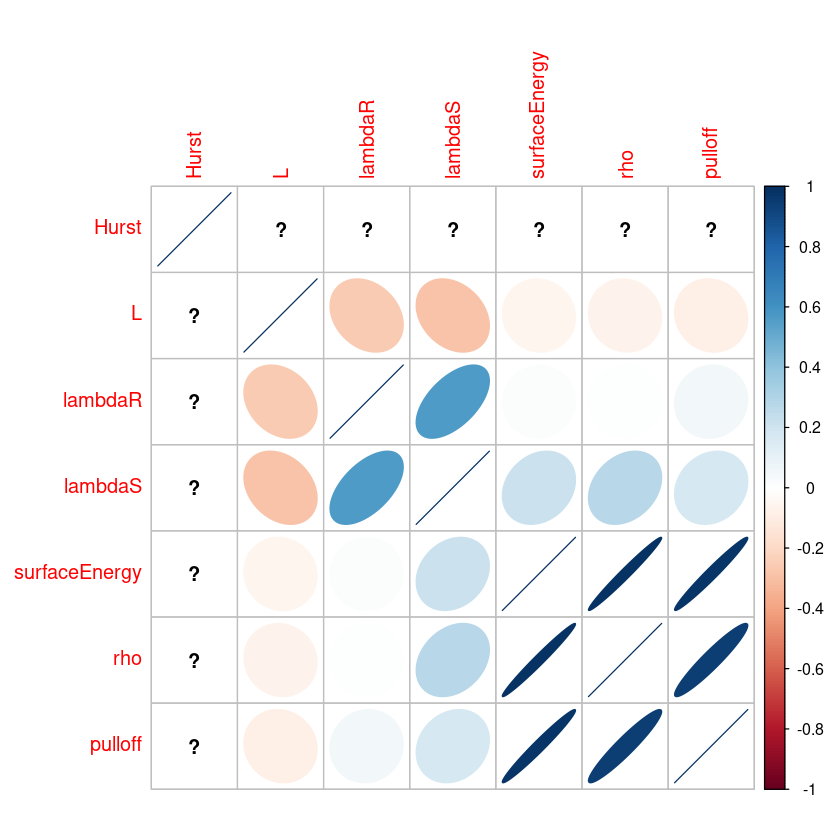

In [5]:
roughContact.cor <- cor(roughContact)

corrplot(roughContact.cor, method='ellipse')

In [6]:
set.seed(1)

sample <- sample(c(TRUE, FALSE), nrow(roughContact), replace = TRUE, prob = c(0.8, 0.2))
train <- roughContact[sample, ]
test <- roughContact[!sample, ]

In [7]:
lmFit <- lm(pulloff ~ rho + surfaceEnergy, data = train)
summary(lmFit)


Call:
lm(formula = pulloff ~ rho + surfaceEnergy, data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057593 -0.005310 -0.001182  0.000776  0.047428 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.002685   0.002488   1.079    0.284    
rho           -0.064314   0.009030  -7.122 4.13e-10 ***
surfaceEnergy  0.089115   0.005200  17.139  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01256 on 80 degrees of freedom
Multiple R-squared:  0.9705,	Adjusted R-squared:  0.9698 
F-statistic:  1317 on 2 and 80 DF,  p-value: < 2.2e-16


In [8]:
pred <- predict(lmFit, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.03489191

In [9]:
lmFit2 <- lm(pulloff ~ lambdaR * lambdaS + surfaceEnergy * rho, data = train)
summary(lmFit2)


Call:
lm(formula = pulloff ~ lambdaR * lambdaS + surfaceEnergy * rho, 
    data = train)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027294 -0.004360  0.000116  0.003041  0.043977 

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8.263e-04  4.132e-03  -0.200   0.8420    
lambdaR           -3.253e-05  3.209e-05  -1.014   0.3138    
lambdaS            3.006e-03  1.579e-03   1.903   0.0608 .  
surfaceEnergy      1.189e-01  7.296e-03  16.298  < 2e-16 ***
rho               -8.727e-02  1.016e-02  -8.587 7.51e-13 ***
lambdaR:lambdaS           NA         NA      NA       NA    
surfaceEnergy:rho -6.195e-03  1.001e-03  -6.189 2.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01039 on 77 degrees of freedom
Multiple R-squared:  0.9806,	Adjusted R-squared:  0.9793 
F-statistic: 778.7 on 5 and 77 DF,  p-value: < 2.2e-16


In [10]:
pred <- predict(lmFit2, test)

sqrt(mean((test$pulloff - pred)^2))

Warning message in predict.lm(lmFit2, test):
“prediction from a rank-deficient fit may be misleading”


[1] 0.005987358

In [11]:
regFit <- regsubsets(pulloff ~ L + lambdaR + lambdaS + rho + surfaceEnergy, train)
summary(regFit)

Subset selection object
Call: regsubsets.formula(pulloff ~ L + lambdaR + lambdaS + rho + surfaceEnergy, 
    train)
5 Variables  (and intercept)
              Forced in Forced out
L                 FALSE      FALSE
lambdaR           FALSE      FALSE
lambdaS           FALSE      FALSE
rho               FALSE      FALSE
surfaceEnergy     FALSE      FALSE
1 subsets of each size up to 5
Selection Algorithm: exhaustive
         L   lambdaR lambdaS rho surfaceEnergy
1  ( 1 ) " " " "     " "     " " "*"          
2  ( 1 ) " " " "     " "     "*" "*"          
3  ( 1 ) "*" " "     " "     "*" "*"          
4  ( 1 ) "*" "*"     " "     "*" "*"          
5  ( 1 ) "*" "*"     "*"     "*" "*"          

In [12]:
splineFit <- lm(pulloff ~ bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15), data = train)
summary(splineFit)


Call:
lm(formula = pulloff ~ bs(L + lambdaR * lambdaS + rho * surfaceEnergy, 
    df = 15), data = train)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0192369 -0.0032204 -0.0005363  0.0031409  0.0309196 

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                 0.001158   0.004152
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)1  -0.006045   0.006341
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)2   0.015536   0.005636
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)3   2.790793   0.133652
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)4  -1.116504   0.036670
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)5   2.253564   0.070586
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)6  -2.836427   0.274184
bs(L + lambdaR * lambdaS + rho * surfaceEnergy, df = 15)7   0.053868   0.006189
bs(L + lambdaR * lambdaS + rho * s

In [13]:
pred <- predict(splineFit, test)

sqrt(mean((test$pulloff - pred)^2))

[1] 0.0202365